In [2]:
import cv2
import numpy as np
import pandas as pd
import sys
import os
import itertools
from IPython.display import Image
import matplotlib.pyplot as plt
from PIL import Image 
from IPython.display import Image

In [3]:
dir_path = "/home/jessica/Documents/SaruulFiles/openCV/DIP3E_Original_Images_CH01"

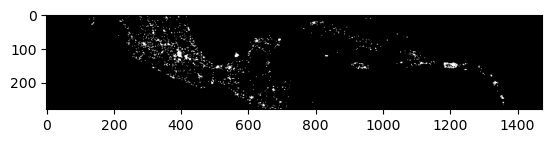

In [4]:
grey_pic_files = []
for i, filename in enumerate(os.listdir(dir_path)):
    if filename.endswith(".tif"):
        if i >= 15:
            break
        img_path = os.path.join(dir_path, filename)
        grey_pic_files.append(img_path)
        for pic in grey_pic_files:
            img = cv2.imread(pic)
            plt.imshow(img)

In [5]:
from sewar.full_ref import uqi

(6000, 4000, 3)


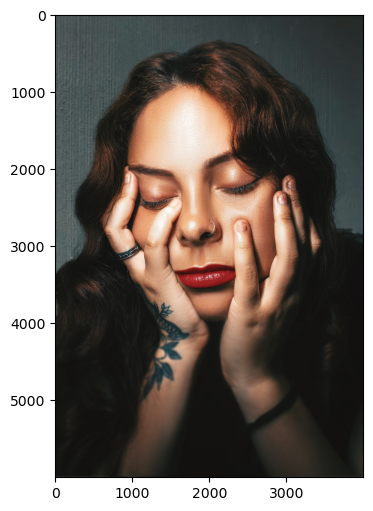

In [10]:
color_im0 = cv2.imread("/home/jessica/Documents/SaruulFiles/openCV/pexels-jhon-ferreira-15270018.jpg",1)[:, :, ::-1]
print(color_im0.shape)
plt.figure(figsize=[8,6])
plt.imshow(color_im0)/home/jessica/Documents/SaruulFiles/openCV/

In [11]:
scale_percent = 50
width = int(color_im0.shape[1] * scale_percent / 100)
height = int(color_im0.shape[0] * scale_percent / 100)
dim = (width, height)

In [12]:
inter_cubic = cv2.resize(color_im0, dsize=dim, interpolation=cv2.INTER_CUBIC)
inter_nearest = cv2.resize(color_im0, dsize=dim, interpolation=cv2.INTER_NEAREST)

In [13]:
uqi(inter_cubic,inter_nearest)

0.9910622283688467

### To examine the image qualituy, following image metric analysises could be used
process of using quantitative measures to analyze various aspects of an image, such as its content, quality, and structure. There are many metrics that can be used to analyze images, including:
1. Pixel count: The number of pixels in an image can indicate its resolution and overall quality.
2. Signal-to-noise ratio (SNR): The ratio of the signal strength to the noise level in an image can indicate its clarity and the presence of unwanted artifacts.
3. Contrast: The difference in brightness or color between different parts of an image can be used to measure its contrast.
4. Sharpness: The degree of detail or focus in an image can be measured using metrics such as edge sharpness or the spatial frequency of the image.
5. Color accuracy: The accuracy of the colors in an image can be measured using metrics such as color gamut, color temperature, or color uniformity.
6. Compression ratio: The amount of compression used in an image can be measured using metrics such as compression ratio, image entropy, or compression artifact analysis.

## 1. Pixel count

We can assess the image's overall resolution and brightness using the pixel count, and we can see the appearance of the colors using the histogram. More pixel counts can provide images with superior resolution, depending on the image. Pictures can be compared for color variation and brightness using the color histogram as well.

In [14]:
pd.options.display.float_format = '{:,}'.format

In [15]:
grey_image = cv2.imread(grey_pic_files[5], 0)
print("Pixel count:", f"{grey_image.size:,d}")

Pixel count: 136,206


In [16]:
print("Pixel count:",f"{color_im0.size:,d}")

Pixel count: 72,000,000


In [17]:
print("Pixel count:",f"{grey_image.shape[0] * grey_image.shape[1] :,d}")

Pixel count: 136,206


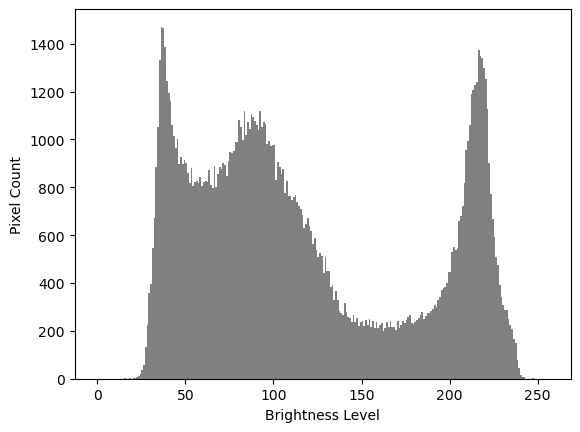

In [18]:
plt.hist(grey_image.flatten(), 256, [0, 256], color='gray')
plt.xlabel('Brightness Level')
plt.ylabel('Pixel Count')
plt.show()

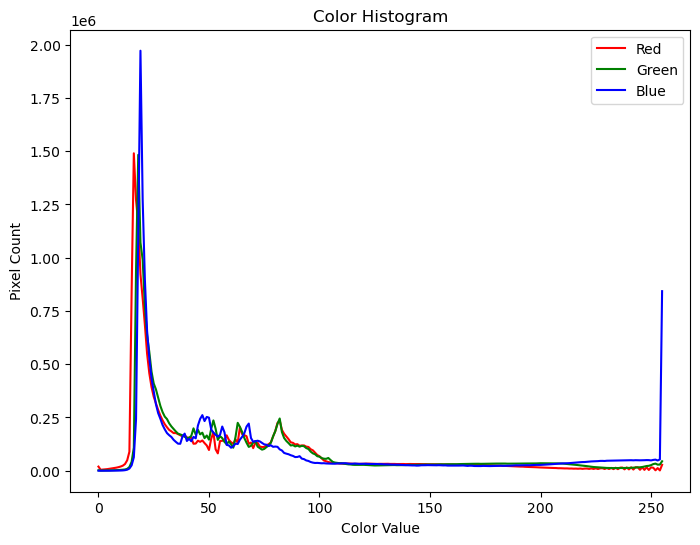

In [19]:
b, g, r = cv2.split(color_im0)

# Calculate the pixel count numbers for each color channel
hist_r, bins_r = np.histogram(r.flatten(), 256, [0, 256])
hist_g, bins_g = np.histogram(g.flatten(), 256, [0, 256])
hist_b, bins_b = np.histogram(b.flatten(), 256, [0, 256])

# Plot the histograms
plt.figure(figsize=(8, 6))
plt.title('Color Histogram')
plt.xlabel('Color Value')
plt.ylabel('Pixel Count')
plt.plot(hist_r, color='red', label='Red')
plt.plot(hist_g, color='green', label='Green')
plt.plot(hist_b, color='blue', label='Blue')
plt.legend()
plt.show()


## 2. Signal to noise ratio

Measure of the quality of a signal, relative to the amount of noise present in the signal. It is commonly used in image processing to quantify the quality of an image.

- PSNR: Peak signal to noise ratio, higher the value PSNR better quality, it may not always provide an accurate representation of image quality, especially for complex images or when the noise is not evenly distributed
- PSNR-B: PSNR-B = 10 * log10((MAX^2)/MSE) Block sensitive - peak signal to noise ratio : is a variation of PSNR that takes into account the sensitivity of the human eye to distortions in different image regions. Measure the quality of a compressed or transmitted image. It is commonly used to evaluate the quality of an image after it has been compressed using lossy  compression techniques

Grayscale images instead of color images
 - When converting a color image to grayscale, we calculate the luminance value of each pixel by taking a weighted average of its red, green, and blue color channels
 - Avoid issues such as differences in color balance or saturation, which may not be directly related to image quality. 

In [60]:
# Convert the images to grayscale
img_original_gray = cv2.cvtColor(inter_nearest, cv2.COLOR_BGR2GRAY)
img_reconstructed_gray = cv2.cvtColor(inter_cubic, cv2.COLOR_BGR2GRAY)

# Calculate the mean squared error (MSE) between the images
mse = np.mean((img_original_gray - img_reconstructed_gray)**2)

# Calculate the maximum possible pixel value
max_pixel_value = 255.0

# Calculate the PSNR in decibels (dB)
psnr = 10 * np.log10((max_pixel_value**2) / mse)

# Print the PSNR
print('Peak Signal-to-Noise Ratio: {:.2f} dB'.format(psnr))

Peak Signal-to-Noise Ratio: 34.94 dB


In [83]:
from sewar.full_ref import psnr
from sewar.full_ref import psnrb

In [21]:
psnr(inter_cubic, inter_nearest)

25.839951776111064

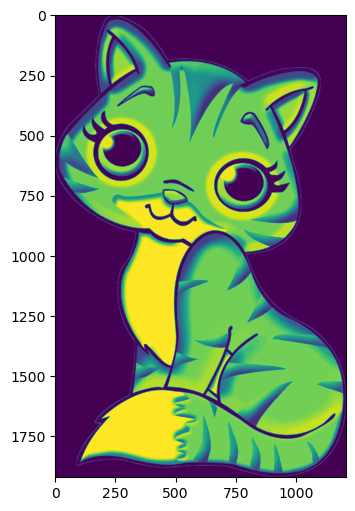

In [37]:
melody = cv2.imread("cat1.png",0)
plt.figure(figsize=[8,6])
plt.imshow(melody)

In [65]:
matrix = np.ones(melody.shape, dtype = "uint8") * 200

img_rgb_brighter = cv2.add(melody, matrix)
img_rgb_darker   = cv2.subtract(melody, matrix)

In [38]:
melody.shape

(1920, 1207)

### Im image darkening and brightening

The image getting more dark or bright, psnr and psnr-b quanity are decreasing, otherwise increasing

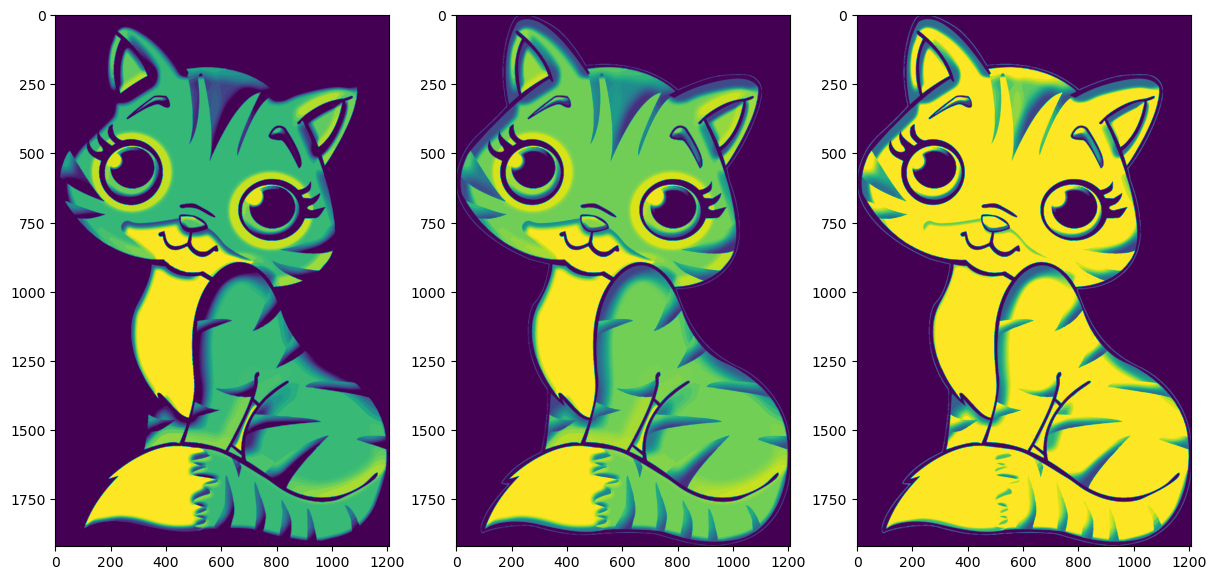

In [39]:
matrix = np.ones(melody.shape, dtype = "uint8") * 90
img_rgb_brighter = cv2.add(melody, matrix)
img_rgb_darker   = cv2.subtract(melody, matrix)
plt.figure(figsize=[25,10])
plt.subplot(151); plt.imshow(img_rgb_darker); 
plt.subplot(152); plt.imshow(melody);   
plt.subplot(153); plt.imshow(img_rgb_brighter);


In [50]:
print(psnr(melody, img_rgb_darker))
print(psnr(melody, img_rgb_brighter))
print(psnr(img_rgb_darker, img_rgb_brighter))

print("PSNR-B sewar:", psnrb(melody, img_rgb_darker))
print("PSNR-B sewar:", psnrb(melody, img_rgb_brighter))
print("PSNR-B sewar:", psnrb(img_rgb_brighter, img_rgb_darker))

mse = np.mean((melody - img_rgb_darker) ** 2)
max_pixel_value = 255.0
psnr_b = 10 * np.log10((max_pixel_value ** 2) / mse)
print("PSNR-B:", psnr_b)


11.832412304550408
10.62291164486949
6.39514060371512
PSNR-B sewar: 11.832407518896684
PSNR-B sewar: 10.62291164486949
PSNR-B sewar: 6.395139235311319
PSNR-B: 28.62046647568738


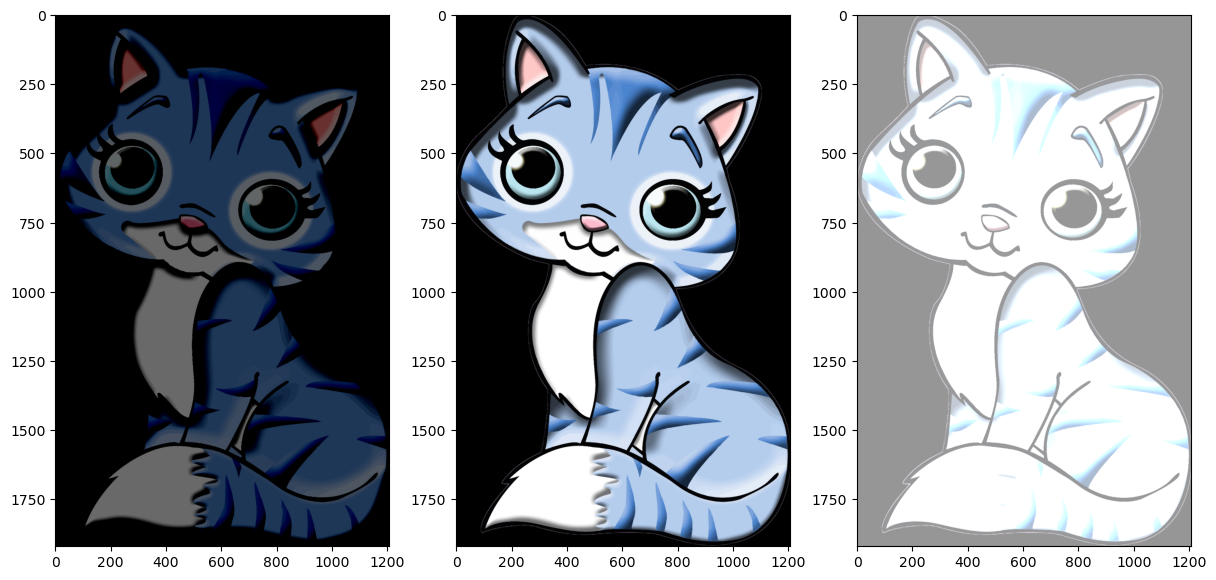

In [29]:
matrix = np.ones(melody.shape, dtype = "uint8") * 150
img_rgb_brighter = cv2.add(melody, matrix)
img_rgb_darker   = cv2.subtract(melody, matrix)
plt.figure(figsize=[25,10])
plt.subplot(151); plt.imshow(img_rgb_darker); 
plt.subplot(152); plt.imshow(melody);   
plt.subplot(153); plt.imshow(img_rgb_brighter);

In [24]:
psnr(melody, img_rgb_brighter)

10.718988282404947

In [30]:
print(psnr(melody, img_rgb_darker))
print(psnr(melody, img_rgb_brighter))

7.704325208309309
6.903963786828227


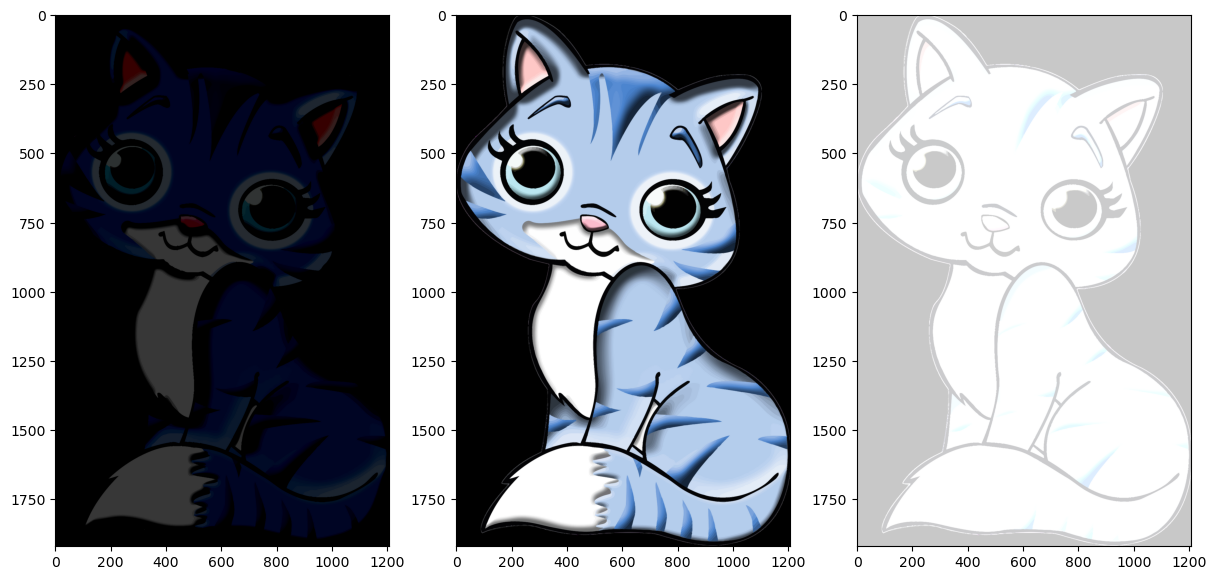

In [33]:
matrix = np.ones(melody.shape, dtype = "uint8") * 200
img_rgb_brighter = cv2.add(melody, matrix)
img_rgb_darker   = cv2.subtract(melody, matrix)
plt.figure(figsize=[25,10])
plt.subplot(151); plt.imshow(img_rgb_darker); blurred = cv2.GaussianBlur(img2, (3, 3), 0)

sobelx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)

grad_mag = np.sqrt(sobelx ** 2 + sobely ** 2)
grad_dir = np.arctan2(sobely, sobelx)

thresh = cv2.threshold(grad_mag, 50, 255, cv2.THRESH_BINARY)[1]

plt.figure(figsize=[20,12])
# plt.subplot(131); plt.imshow(img1)
# plt.subplot(132); plt.imshow(blurred)
# plt.subplot(133); plt.imshow(edges_default)
plt.subplot(131); plt.imshow(blurred)
plt.subplot(132); plt.imshow(sobelx)
plt.subplot(133); plt.imshow(sobely)
plt.subplot(152); plt.imshow(melody);   
plt.subplot(153); plt.imshow(img_rgb_brighter);

In [34]:
print(psnr(melody, img_rgb_darker))
print(psnr(melody, img_rgb_brighter))

5.622394669496371
4.732197402885982


### For the bitwise

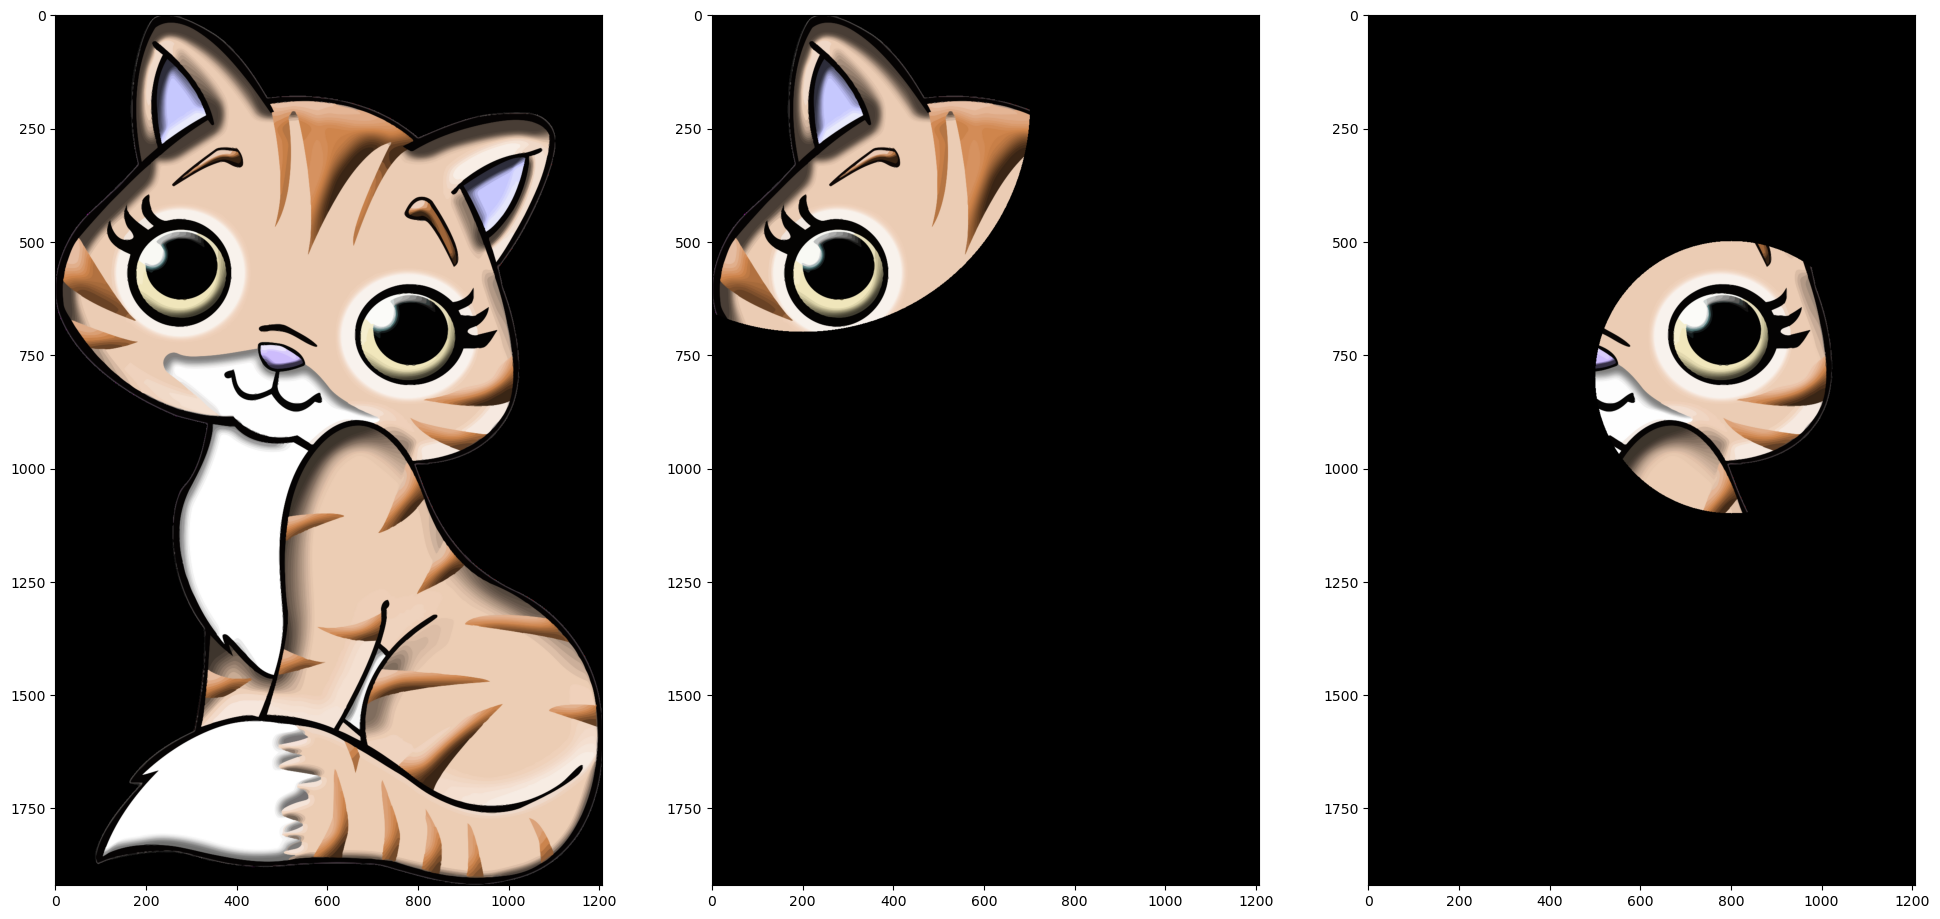

In [51]:
img = cv2.imread('cat1.png')

mask1 = np.zeros(img.shape[:2], dtype=np.uint8)
mask2 = np.zeros(img.shape[:2], dtype=np.uint8)

cv2.circle(mask1, (200, 200), 500, 255, -1)
cv2.circle(mask2, (800, 800), 300, 255, -1)
masked_img1 = cv2.bitwise_and(img, img, mask=mask1)
masked_img2 = cv2.bitwise_and(img, img, mask=mask2)

plt.figure(figsize=[24,15])
plt.subplot(131); plt.imshow(img)
plt.subplot(132); plt.imshow(masked_img1)
plt.subplot(133); plt.imshow(masked_img2)

In [53]:
print(psnr(img, masked_img1))
print(psnr(img, masked_img2))
print(psnr(masked_img1, masked_img2))

print("PSNR-B sewar:", psnrb(img, masked_img1))
print("PSNR-B sewar:", psnrb(img, masked_img2))
print("PSNR-B sewar:", psnrb(masked_img1, masked_img2))

5.3694002953837225
5.3448436005271915
9.852888060855742
PSNR-B sewar: 4.6344242747467534
PSNR-B sewar: 4.565287172500793
PSNR-B sewar: 8.919968263576662


### For the quantization noise

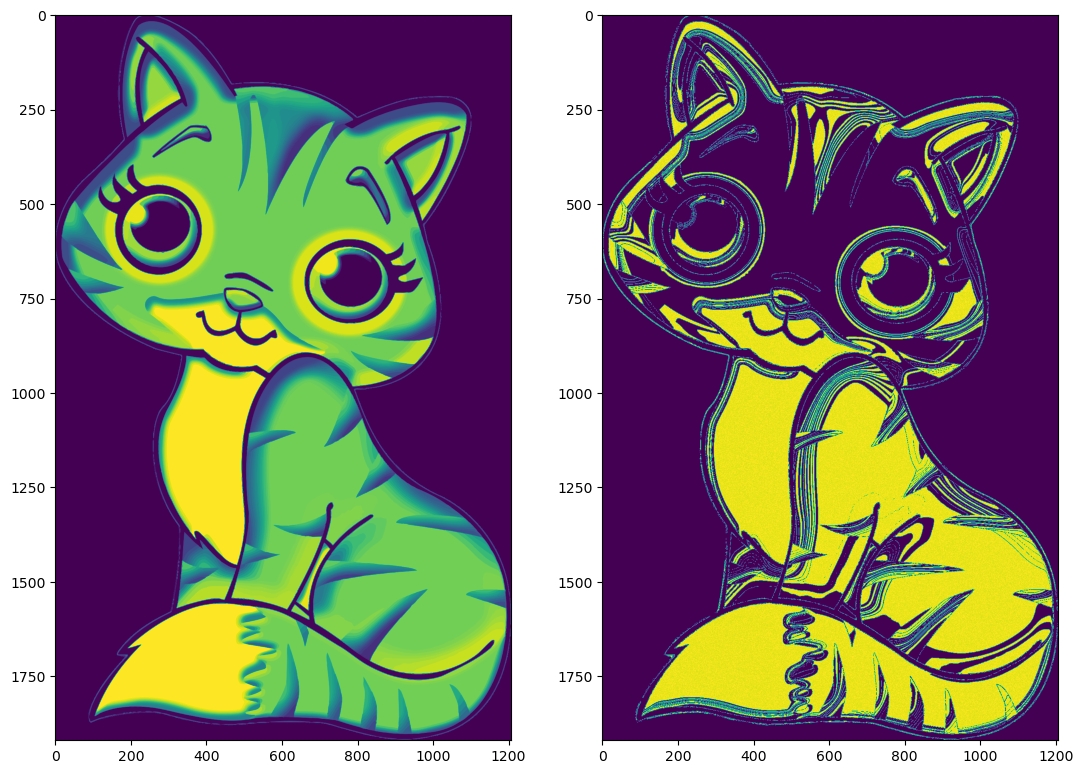

In [54]:
bits = 4
levels = 2 ** bits
quantized_img = np.round(levels * melody / 256) * (256 / levels)

noise = np.random.uniform(-0.5, 0.5, melody.shape)
noisy_img = np.clip(quantized_img + noise, 0, 255).astype(np.uint8)
plt.figure(figsize=[20,12])
plt.subplot(131); plt.imshow(melody)
plt.subplot(132); plt.imshow(noisy_img)

In [55]:
print(psnr(melody, noisy_img))
print("PSNR-B sewar:", psnrb(melody, noisy_img))

5.274354924610547
PSNR-B sewar: 5.274354924610547


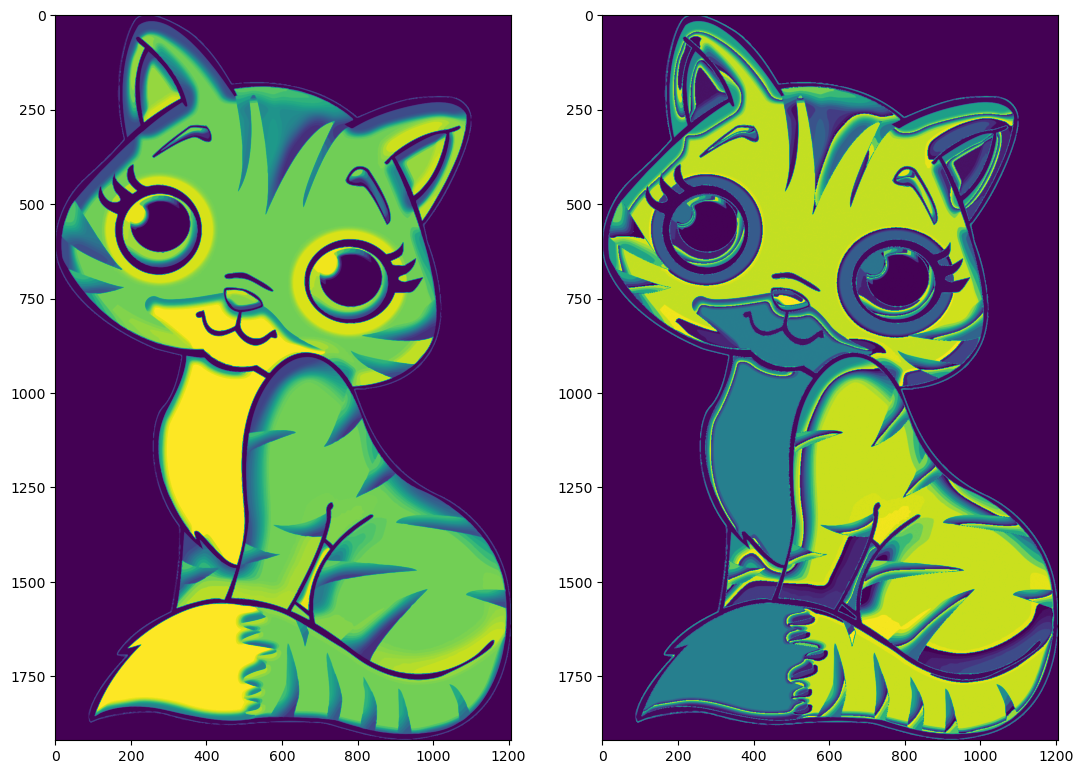

In [67]:
bits = 4
levels = 5 ** bits
quantized_img = np.round(levels * melody / 50) * (60 / levels)

noise = np.random.uniform(-0.5, 0.5, melody.shape)
noisy_img = np.clip(quantized_img + noise, 0, 255).astype(np.uint8)
plt.figure(figsize=[20,12])
plt.subplot(131); plt.imshow(melody)
plt.subplot(132); plt.imshow(noisy_img)

In [68]:
print(psnr(melody, noisy_img))

print("PSNR-B sewar:", psnrb(melody, noisy_img))

8.51294257148506
PSNR-B sewar: 8.51294257148506


### Gaussian blur / noise

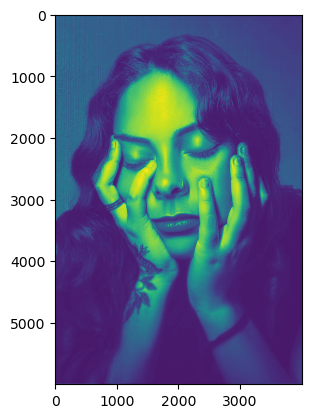

In [75]:
img2 = cv2.imread('/home/jessica/Documents/SaruulFiles/openCV/pexels-jhon-ferreira-15270018.jpg', 1)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
plt.imshow(img2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


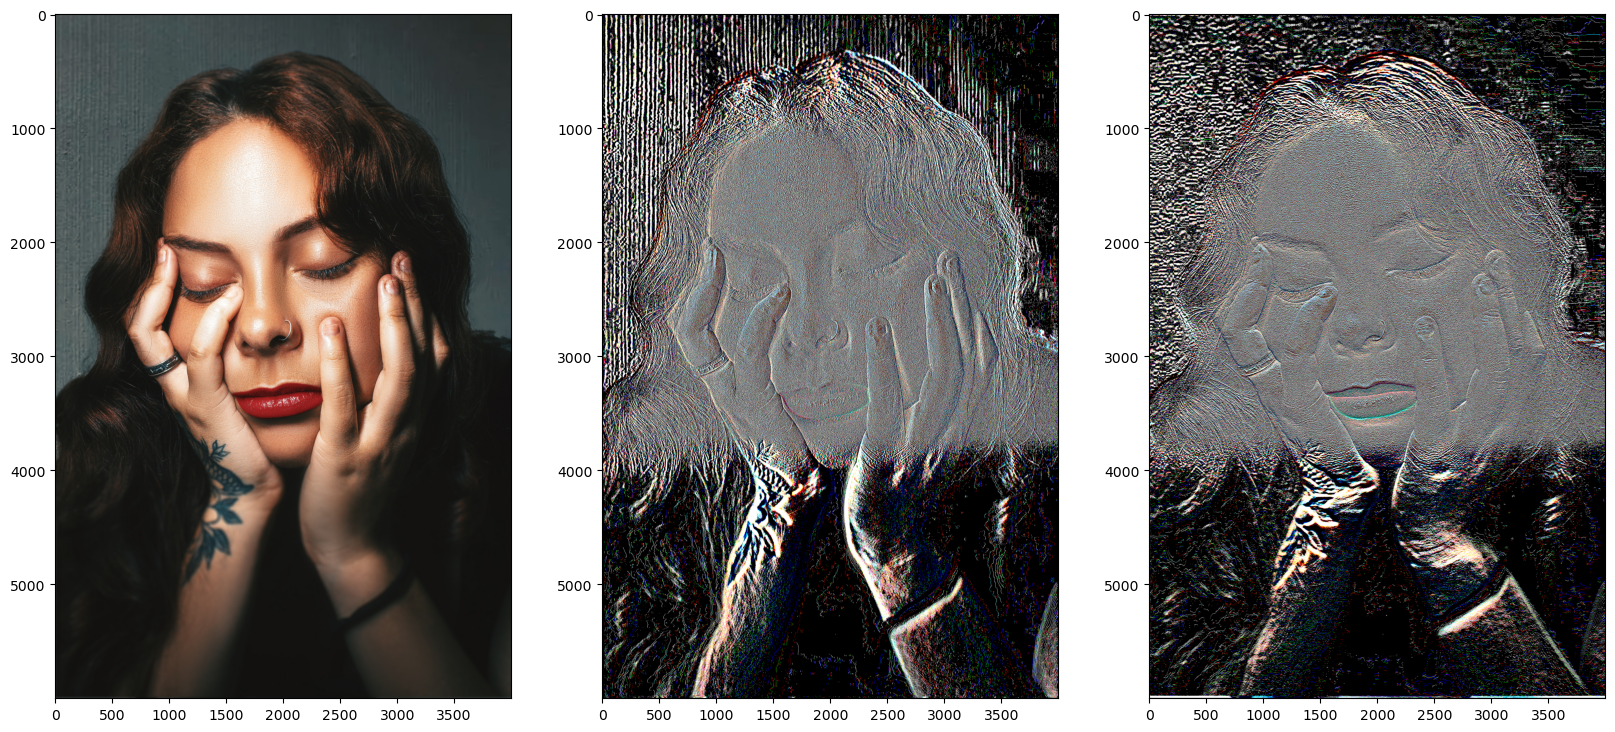

In [70]:
blurred = cv2.GaussianBlur(img2, (3, 3), 0)

sobelx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)

grad_mag = np.sqrt(sobelx ** 2 + sobely ** 2)
grad_dir = np.arctan2(sobely, sobelx)

thresh = cv2.threshold(grad_mag, 50, 255, cv2.THRESH_BINARY)[1]

plt.figure(figsize=[20,12])
# plt.subplot(131); plt.imshow(img1)
# plt.subplot(132); plt.imshow(blurred)
# plt.subplot(133); plt.imshow(edges_default)
plt.subplot(131); plt.imshow(blurred)
plt.subplot(132); plt.imshow(sobelx)
plt.subplot(133); plt.imshow(sobely)

In [72]:
print(psnr(img2, blurred))
print(psnr(img2, sobelx))
print(psnr(img2, sobely))
print(psnr(img2, grad_mag))
print(psnr(img2, grad_dir))

27.64904345754062


/home/jessica/anaconda3/lib/python3.10/site-packages/sewar/utils.py:18: UserWarning: Supplied images have different dtypes uint8 and float64
  warnings.warn(msg)


8.330437738415755
8.407707999541737
10.947347888459493
8.855157670394036


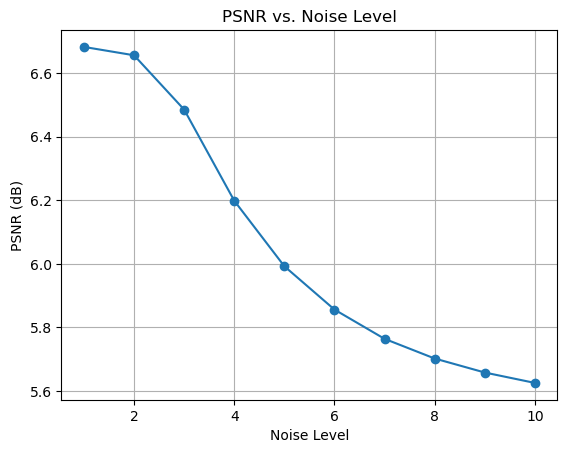

In [86]:
import cv2
import numpy as np
from sewar.full_ref import psnr
import matplotlib.pyplot as plt

gauss_noise = np.zeros_like(img2)
cv2.randn(gauss_noise, 0, 150)

psnr_values = []
for i in range(10):
    img2 = cv2.add(img2, 0.1 * (i + 1) * gauss_noise, dtype=cv2.CV_8UC3)
    blurred = cv2.GaussianBlur(img2, (3, 3), 0)
    sobelx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)
    psnr_val = psnr(np.add(sobelx,sobely).astype(np.uint8), img2)
    psnr_values.append(psnr_val)

noise_levels = np.arange(1, 11)
plt.plot(noise_levels, psnr_values, 'o-')
plt.title('PSNR vs. Noise Level')
plt.xlabel('Noise Level')
plt.ylabel('PSNR (dB)')
plt.grid()
plt.show()

In [79]:
img2

array([[106,  84, 115, ...,  49,  49,  55],
       [ 82,  88,  98, ...,  49,  47,  48],
       [ 84,  87,  86, ...,  56,  46,  46],
       ...,
       [ 86,  59,  71, ...,  54,  56,  64],
       [ 76,  69,  81, ...,  55,  58,  55],
       [ 63,  64,  60, ...,  56,  56,  70]], dtype=uint8)

In [80]:
sobelx + sobely

array([[  0.,  24.,  -2., ..., -30., -10.,   0.],
       [-10.,   6., -20., ..., -30., -18.,  -8.],
       [ 10.,  18.,  -4., ..., -48., -20.,  -2.],
       ...,
       [ 14.,   8.,  -8., ..., -16.,   6.,   0.],
       [ -6., -10., -10., ...,  -6.,  16.,   6.],
       [  0.,  -4.,  -6., ...,  -8.,  12.,   0.]])

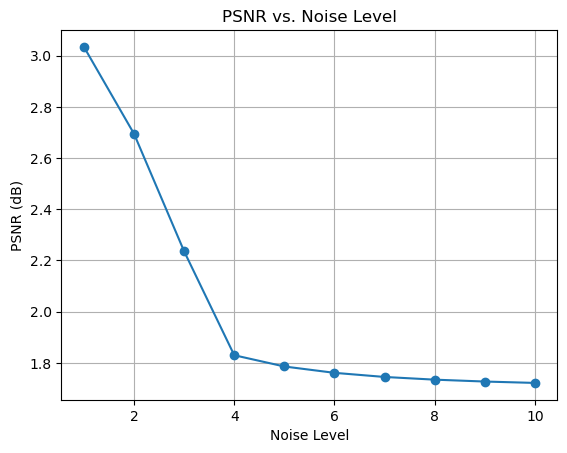

In [90]:
import cv2
import numpy as np
from sewar.full_ref import psnr
import matplotlib.pyplot as plt

gauss_noise = np.zeros_like(img2)
cv2.randn(gauss_noise, 200, 1000)

psnr_values = []
for i in range(10):
    img2 = cv2.add(img2, 0.1 * (i + 1) * gauss_noise, dtype=cv2.CV_8UC3)
    blurred = cv2.GaussianBlur(img2, (3, 3), 0)
    sobelx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)
    psnr_val = psnr(np.add(sobelx,sobely).astype(np.uint8), img2)
    psnr_values.append(psnr_val)

noise_levels = np.arange(1, 11)
plt.plot(noise_levels, psnr_values, 'o-')
plt.title('PSNR vs. Noise Level')
plt.xlabel('Noise Level')
plt.ylabel('PSNR (dB)')
plt.grid()
plt.show()

The psnr coefficient is dropping as noise intensity rises.

### Salt and pepper noise

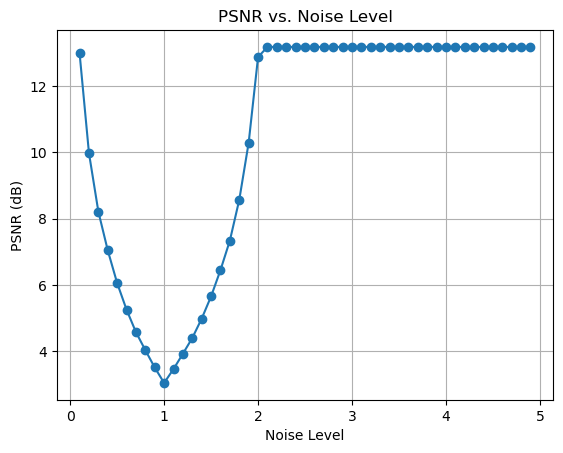

In [95]:
noise_levels = np.arange(0.1, 5, 0.1)
psnr_values = []

for level in noise_levels:
    noise = np.zeros_like(img2)
    cv2.randu(noise, 0, 255)
    black = noise < 255 * level / 2
    white = noise > 255 * (1 - level / 2)
    img_noisy = img2.copy()
    img_noisy[black] = 0
    img_noisy[white] = 255
    psnr_val = psnr(img2, img_noisy)
    psnr_values.append(psnr_val)

plt.plot(noise_levels, psnr_values, 'o-')
plt.title('PSNR vs. Noise Level')
plt.xlabel('Noise Level')
plt.ylabel('PSNR (dB)')
plt.grid()
plt.show()

Over 2 psnr level, the salt and pepper noise stabilizes between 0 and 2 psnr coefficient acquiring a parabolic shape.

### Edge detection

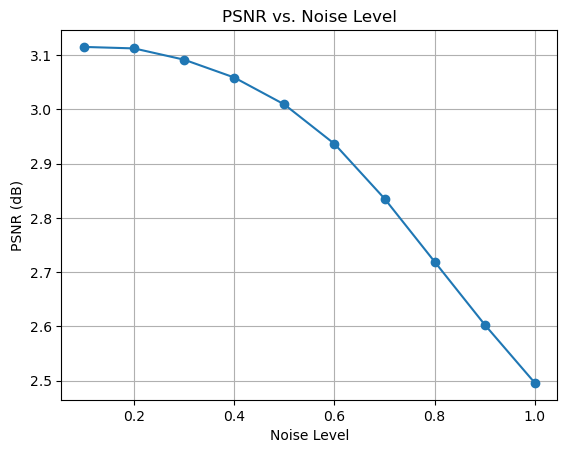

In [98]:
gauss_noise = np.zeros_like(img2)
cv2.randn(gauss_noise, 0, 50)  # mean = 0, standard deviation = 50

psnr_values = []
noise_levels = []
for i in range(10):
    noise_level = 0.1 * (i + 1)
    noise_levels.append(noise_level)
    img2 = cv2.add(img2, noise_level * gauss_noise, dtype=cv2.CV_8UC3)
    blurred = cv2.GaussianBlur(img2, (3, 3), 0)
    sobelx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)
    psnr_val = psnr(img2, np.add(sobelx,sobely).astype(np.uint8))
    psnr_values.append(psnr_val)

plt.plot(noise_levels, psnr_values, 'o-')
plt.title('PSNR vs. Noise Level')
plt.xlabel('Noise Level')
plt.ylabel('PSNR (dB)')
plt.grid()
plt.show()

## SSIM

The Structural Similarity Index (SSIM) is a measure of the structural similarity between two images. It takes into account three aspects of the images:

luminance: the perceived brightness of the image
contrast: the difference in brightness between pixels in the image
structure: the patterns of pixel intensities in the image.

The SSIM index ranges from -1 to 1, with a value of 1 indicating perfect structural similarity between the two images. Generally, a value above 0.9 is considered a good match, while a value below 0.5 indicates a significant difference between the two images.

In [109]:
from sewar.full_ref import ssim

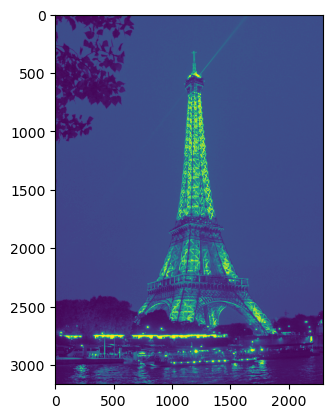

In [113]:
img = cv2.imread('/home/jessica/Documents/SaruulFiles/openCV/eiffel_tower_france_paris.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)

In [111]:
noise = np.random.poisson(50, img.shape).astype(np.float32)
noisy_img = np.clip(img + noise, 50, 200).astype(np.uint8)

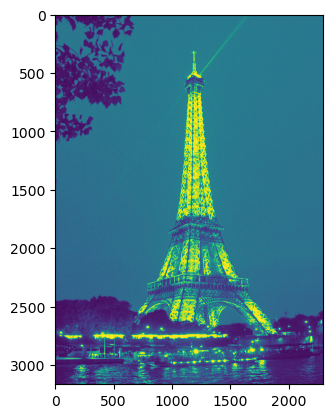

In [112]:
plt.imshow(noisy_img)

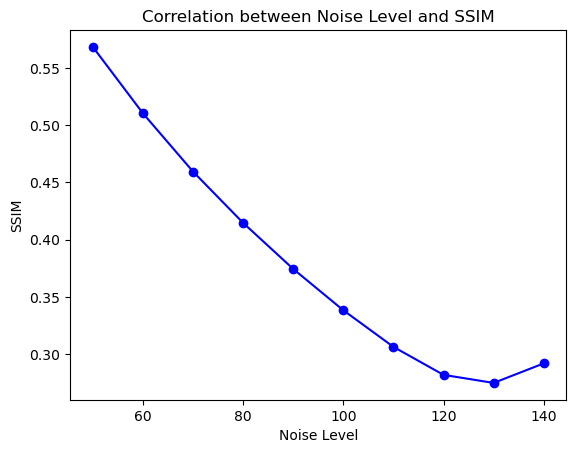

In [118]:
noise_level = 50
step_size = 10

noise_levels = []
ssim_vals = []
from skimage.metrics import structural_similarity as ssim

for i in range(10):
    noise = np.random.poisson(noise_level, img.shape).astype(np.float32)
    noisy_img = np.clip(img2 + noise, 50, 200).astype(np.uint8)
    
    ssim_val = ssim(img2, noisy_img, data_range=300)
    noise_levels.append(noise_level)
    ssim_vals.append(ssim_val)
    
    noise_level += step_size

plt.plot(noise_levels, ssim_vals, 'bo-')
plt.xlabel('Noise Level')
plt.ylabel('SSIM')
plt.title('Correlation between Noise Level and SSIM')
plt.show()

## MSE

It calculates the average squared difference between the pixel intensities of the two images.  MSE is commonly used to evaluate the quality of compressed or distorted images. A lower MSE value indicates that the distorted image is closer to the original image. However, MSE does not always correlate well with human perception of image quality, as it does not take into account the structural information of the image. In other words, images that have the same MSE value may appear very different to humans.



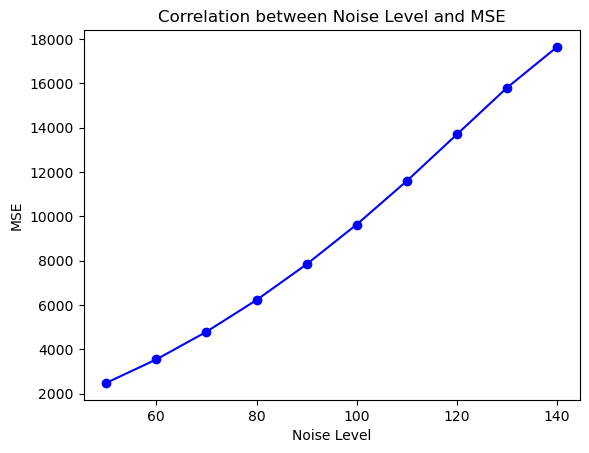

In [120]:
from skimage.metrics import mean_squared_error as mse

noise_level = 50
step_size = 10

noise_levels = []
mse_vals = []

for i in range(10):
    noise = np.random.poisson(noise_level, img.shape).astype(np.float32)
    noisy_img = np.clip(img + noise, 50, 200).astype(np.uint8)
    mse_val = mse(img, noisy_img)
    
    noise_levels.append(noise_level)
    mse_vals.append(mse_val)
    
    noise_level += step_size

# Plot the correlation graph
plt.plot(noise_levels, mse_vals, 'bo-')
plt.xlabel('Noise Level')
plt.ylabel('MSE')
plt.title('Correlation between Noise Level and MSE')
plt.show()

## SAM

SAM (Angle Similarity Mapper) is a metric used to measure the similarity between two images. Angle between the two vectors representing the pixel intensities of two images in the n-dimensional space, where n is the number of bands (color channels) of the images.

SAM compares the angular difference between two vectors and returns a value between 0 and 1, where 0 indicates that the two vectors are completely different (i.e., the two images are dissimilar) and 1 indicates that the two vectors are identical (i.e., the two images are similar). 

In [127]:
from sewar.full_ref import sam
from skimage.filters import gaussian
from skimage.util import random_noise
import sewar


/tmp/ipykernel_14092/2217394796.py:8: FutureWarning: `multichannel` is a deprecated argument name for `gaussian`. It will be removed in version 1.0. Please use `channel_axis` instead.
  blurred_img = gaussian(img, sigma=distortion_level, multichannel=True)


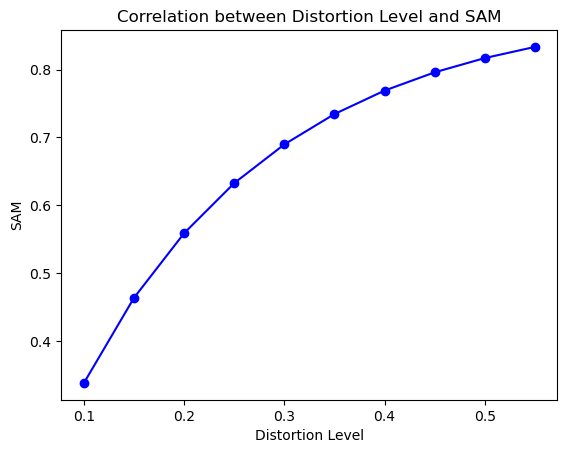

In [130]:
distortion_level = 0.1
step_size = 0.05

distortion_levels = []
sam_vals = []

for i in range(10):
    blurred_img = gaussian(img, sigma=distortion_level, multichannel=True)
    noisy_img = random_noise(img, var=distortion_level**2)
    sam_val = sewar.full_ref.sam(img, noisy_img)
    
    distortion_levels.append(distortion_level)
    sam_vals.append(sam_val)
    
    distortion_level += step_size

plt.plot(distortion_levels, sam_vals, 'bo-')
plt.xlabel('Distortion Level')
plt.ylabel('SAM')
plt.title('Correlation between Distortion Level and SAM')
plt.show()

## SCC

The Structural Content Correction (SCC) metric is a full-reference image quality assessment metric that measures the amount of structural distortion present in a distorted image compared to the original image. SCC is based on the assumption that the visual content of an image is composed of a set of structural primitives, such as edges, textures, and regions, and that the quality of an image is determined by the quality of these primitives.

The SCC metric ranges from 0 to 1, with 0 indicating complete structural distortion and 1 indicating no structural distortion. A higher SCC value indicates a higher level of similarity between the original and distorted images in terms of their structural content.



/tmp/ipykernel_14092/1195984949.py:8: FutureWarning: `multichannel` is a deprecated argument name for `gaussian`. It will be removed in version 1.0. Please use `channel_axis` instead.
  blurred_img = gaussian(img, sigma=distortion_level, multichannel=True)


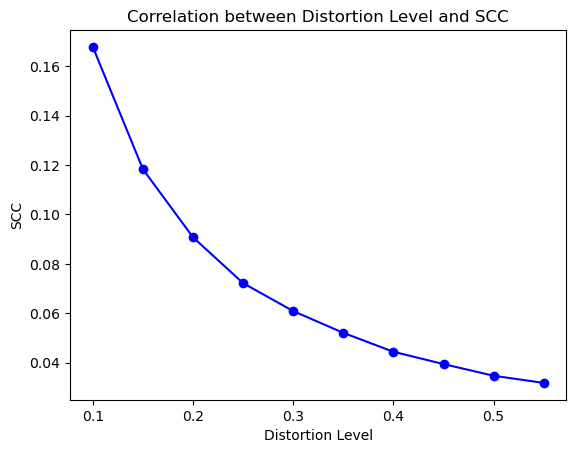

In [131]:
distortion_level = 0.1
step_size = 0.05

distortion_levels = []
scc_vals = []

for i in range(10):
    blurred_img = gaussian(img, sigma=distortion_level, multichannel=True)
    noisy_img = random_noise(img, var=distortion_level**2)
    
    scc_val = sewar.full_ref.scc(img, noisy_img)
    
    distortion_levels.append(distortion_level)
    scc_vals.append(scc_val)
    distortion_level += step_size

plt.plot(distortion_levels, scc_vals, 'bo-')
plt.xlabel('Distortion Level')
plt.ylabel('SCC')
plt.title('Correlation between Distortion Level and SCC')
plt.show()